# Practice midterm questions


A regulation baseball is about 74 mm in diameter, with a mass of 145 g. A trajectory of the baseball has been calculated, including the effects of air resistance and gravity, and you are given the time, t,  and the position, pos of the ball in the code segment below.

In [2]:
import numpy as np
t=np.array([0.        , 0.12121212, 0.24242424, 0.36363636, 0.48484848,
       0.60606061, 0.72727273, 0.84848485, 0.96969697, 1.09090909,
       1.21212121, 1.33333333, 1.45454545, 1.57575758, 1.6969697 ,
       1.81818182, 1.93939394, 2.06060606, 2.18181818, 2.3030303 ,
       2.42424242, 2.54545455, 2.66666667, 2.78787879, 2.90909091,
       3.03030303, 3.15151515, 3.27272727, 3.39393939, 3.51515152,
       3.63636364, 3.75757576, 3.87878788, 4.        , 4.12121212,
       4.24242424, 4.36363636, 4.48484848, 4.60606061, 4.72727273,
       4.84848485, 4.96969697, 5.09090909, 5.21212121, 5.33333333,
       5.45454545, 5.57575758, 5.6969697 , 5.81818182, 5.93939394])
pos=np.array([[  0.        ,   3.35883484,   6.70164751,  10.02889653,
         13.34102351,  16.63845609,  19.9216017 ,  23.19084866,
         26.44656627,  29.68910488,  32.91879589,  36.13595171,
         39.34086578,  42.53381257,  45.71504759,  48.88480738,
         52.0433095 ,  55.19075254,  58.32731613,  61.45316092,
         64.56842861,  67.67324191,  70.76770456,  73.85190134,
         76.92589806,  79.98974156,  83.04345971,  86.08706139,
         89.12053654,  92.14385613,  95.15697212,  98.15981756,
        101.15230648, 104.13433396, 107.10579467, 110.06657275,
        113.01653014, 115.95552437, 118.8834086 , 121.80003163,
        124.70523784, 127.59886724, 130.48075547, 133.35073377,
        136.20862901, 139.05426365, 141.88745581, 144.7080192 ,
        147.51576314, 150.31049258],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   3.28695822,   6.41459264,   9.38401276,
         12.19639316,  14.85299003,  17.35461655,  19.7020457 ,
         21.89603495,  23.93732625,  25.82664604,  27.56470526,
         29.15219933,  30.58980815,  31.8781961 ,  33.01801208,
         34.00988946,  34.85444607,  35.55228428,  36.1039909 ,
         36.51013725,  36.77127915,  36.88795687,  36.86069521,
         36.69000342,  36.37637526,  35.92028897,  35.32220728,
         34.58257742,  33.70183107,  32.68038443,  31.51863818,
         30.21697749,  28.775772  ,  27.19570125,  25.47758939,
         23.62203046,  21.62964112,  19.50106063,  17.23695085,
         14.83799624,  12.30490387,   9.63840344,   6.83924723,
          3.90821012,   0.84608961,  -2.34629419,  -5.66809857,
         -9.11845822, -12.69648521]])

Plot the trajectory (z versus time)

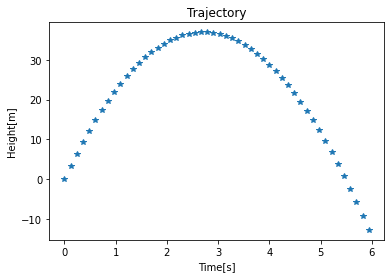

In [4]:
import matplotlib.pyplot as plt
plt.plot(t,pos[2,:],"*")
plt.title('Trajectory')
plt.xlabel("Time[s]")
plt.ylabel("Height[m]")
plt.show()

Interpolate, using every other point (so 25 values).  Plot the interpolation overlaid on the original data and compare the interpolation to the data at all 50 values.   

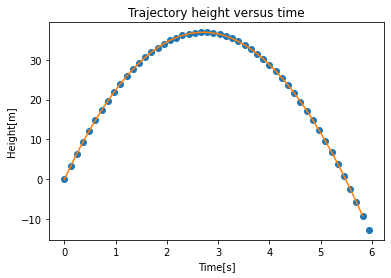

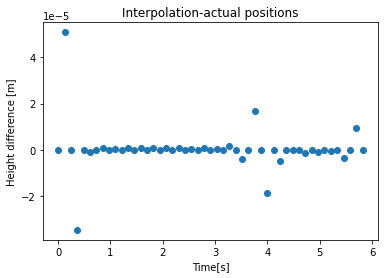

In [5]:
from scipy.interpolate import interp1d
trajz=interp1d(t[::2],pos[2,::2],kind='cubic')
trajx=interp1d(t[::2],pos[0,::2],kind='cubic')
plt.plot(t,pos[2,:],'o')
plt.plot(t[:-1],trajz(t[:-1]))
plt.title("Trajectory height versus time")
plt.xlabel("Time[s]")
plt.ylabel("Height[m]")
plt.show()
plt.plot(t[:-1],trajz(t[:-1])-pos[2,:-1],'o')
plt.title("Interpolation-actual positions")
plt.xlabel("Time[s]")
plt.ylabel("Height difference [m]")
plt.show()

Solve for the time and position when z=0 (the ball returns to the ground)

In [6]:
from scipy.optimize import root
time=root(trajz,5).x[0]
print(f'The ball returns to the ground at time={time:5.3}s, and at (x,z)=({trajx(time):6.1f},{trajz(time):4.2}) m')

The ball returns to the ground at time= 5.49s, and at (x,z)=( 139.8,4.5e-12) m


From the interpolated trajectory $\vec{x}(t)$, calculate the velocity and the acceleration and plot both non-zero components.

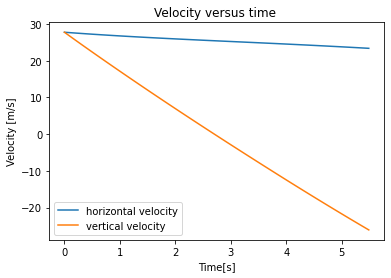

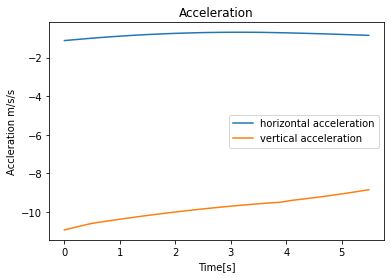

In [9]:
def x(t):
    return np.array([trajx(t),np.zeros_like(t),trajz(t)])

def v(t):
    tplus=t+5e-6
    tminus=t-5e-6
    return (x(tplus)-x(tminus))/(tplus-tminus)

def a(t):
    tplus=t+5e-6
    tminus=t-5e-6
    return (v(tplus)-v(tminus))/(tplus-tminus)
            
tlist=np.linspace(1e-5,time-1e-5,100)
plt.plot(tlist, v(tlist)[0],label='horizontal velocity')
plt.plot(tlist, v(tlist)[2],label='vertical velocity')
plt.legend()
plt.title('Velocity versus time ')
plt.xlabel("Time[s]")
plt.ylabel("Velocity [m/s]")
plt.show()
plt.plot(tlist,a(tlist)[0],label='horizontal acceleration')
plt.plot(tlist,a(tlist)[2],label='vertical acceleration')
plt.legend()
plt.title("Acceleration")
plt.xlabel("Time[s]")
plt.ylabel('Accleration m/s/s')
plt.show()


From the acceleration, calculate and plot the force due to air resistance.

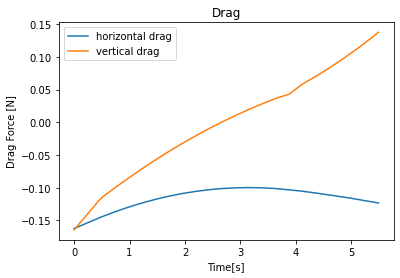

In [12]:
mass=0.145 #kg
g=np.array([0,0,-9.8])

# the drag is mass*acceleration-mass * g
def fDrag(t):
    return np.array([a(tt)-g for tt in t])*mass
plt.plot(tlist,fDrag(tlist)[:,0],label='horizontal drag')
plt.plot(tlist,fDrag(tlist)[:,2],label='vertical drag')
plt.legend()
plt.title("Drag")
plt.xlabel("Time[s]")
plt.ylabel('Drag Force [N]')
plt.show()

Using the definition of work: $W=\int \vec{F}\cdot \vec{dx}=\int \vec{F}\cdot \vec{v} dt$ calculate the work done against air resistance.

In [42]:
def fDrag2(t):
    return mass*(a(t)-g)
def Work(t):
    return np.dot(fDrag2(t),v(t))

from scipy.integrate import quad
print(f' The work done against air resistance is {quad(Work,1e-5,time-1e-5)} J')

 The work done against air resistance is (-22.84606888948284, 0.00031821624866523734) J


<ipython-input-42-4bb4d9025c75>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print(f' The work done against air resistance is {quad(Work,1e-5,time-1e-5)} J')


Help on function romberg in module scipy.integrate._quadrature:

romberg(function, a, b, args=(), tol=1.48e-08, rtol=1.48e-08, show=False, divmax=10, vec_func=False)
    Romberg integration of a callable function or method.
    
    Returns the integral of `function` (a function of one variable)
    over the interval (`a`, `b`).
    
    If `show` is 1, the triangular array of the intermediate results
    will be printed. If `vec_func` is True (default is False), then
    `function` is assumed to support vector arguments.
    
    Parameters
    ----------
    function : callable
        Function to be integrated.
    a : float
        Lower limit of integration.
    b : float
        Upper limit of integration.
    
    Returns
    -------
    results : float
        Result of the integration.
    
    Other Parameters
    ----------------
    args : tuple, optional
        Extra arguments to pass to function. Each element of `args` will
        be passed as a single argument to `func